In [92]:
import numpy as np
import pandas as pd
from IPython.display import display
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")
submission_data = pd.read_csv('./data/sample_submission.csv')

In [4]:
train_data.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [5]:
test_data.describe()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,...,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04
mean,5.773787e+04,6.258726e+04,1.036752e+05,6.289853e+04,6.713354e+04,8.083879e+04,6.181014e+04,5.515752e+04,1.406324e+06,8.128668e+04,...,1.193910e+05,1.355955e+05,3.242217e+05,1.437856e+05,9.302367e+04,8.047145e+04,6.076865e+04,1.323210e+05,1.675766e+05,1.282487e+05
std,1.745182e+06,2.322787e+06,2.586951e+06,2.765941e+06,3.206124e+06,2.845031e+06,2.780137e+06,1.923517e+06,6.872366e+06,2.378938e+06,...,3.115190e+06,2.598454e+06,3.782996e+06,3.663374e+06,5.041000e+06,2.100210e+06,2.040655e+06,3.592018e+06,3.761816e+06,2.413798e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.504447e+08,2.283295e+08,2.758171e+08,3.972621e+08,4.667591e+08,2.852223e+08,4.863751e+08,2.043290e+08,3.435658e+08,2.310167e+08,...,5.351692e+08,1.236547e+08,3.793398e+08,4.025480e+08,9.657530e+08,1.680065e+08,2.497913e+08,3.200000e+08,3.186300e+08,2.189782e+08


In [6]:
train_data.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [9]:
any(np.isnan(train_data.isnull().sum().values))

# No missing values in the training data

False

In [10]:
any(np.isnan(test_data.isnull().sum().values))

False

In [3]:
# Since there are so many parameters, let's use XGBoost to select features
X = train_data.iloc[:, 2:].values
y = train_data['target'].values

In [4]:
print(X.shape)
print(y.shape)

(4459, 4991)
(4459,)


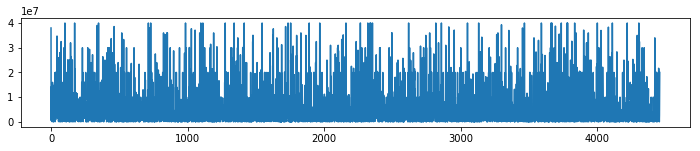

In [46]:
plt.plot(y)
plt.gcf().set_size_inches(12, 2)
plt.show()

In [14]:
model = XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [90]:
def RMSLE(y_predict, y_test):
    """Evaluation metric Root Mean Squared Logarithmic Error"""
    return np.sqrt(np.nanmean((np.log(y_predict+1) - np.log(y_test+1))**2))

In [16]:
y_predict = model.predict(X)
print(RMSLE(y_predict, y))

1.8393296647239583


In [17]:
def extract_important_features(feature_importances, tol=1E-6):
    # filter out features that has minimal importance
    important_feature_ind = np.where(feature_importances > 1E-6)[0]
    important_features = model.feature_importances_[important_feature_ind]
    sorted_important_feature_ind = np.array([x for _,x in sorted(
                    zip(important_features,important_feature_ind))])[::-1]
    return sorted_important_feature_ind

In [18]:
sorted_important_feature_ind = extract_important_features(model.feature_importances_)

In [19]:
len(sorted_important_feature_ind)

272

In [20]:
model.feature_importances_[sorted_important_feature_ind]

array([0.03448276, 0.02758621, 0.01896552, 0.01896552, 0.01724138,
       0.0137931 , 0.0137931 , 0.01206897, 0.01206897, 0.01206897,
       0.01034483, 0.01034483, 0.01034483, 0.01034483, 0.00862069,
       0.00862069, 0.00862069, 0.00862069, 0.00862069, 0.00862069,
       0.00862069, 0.00862069, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00517241, 0.00517241, 0.00517241, 0.00517241,
       0.00517241, 0.00517241, 0.00517241, 0.00517241, 0.00517241,
       0.00517241, 0.00517241, 0.00517241, 0.00517241, 0.00517241,
       0.00517241, 0.00517241, 0.00517241, 0.00517241, 0.00517241,
       0.00517241, 0.00517241, 0.00517241, 0.00517241, 0.00517241,
       0.00517241, 0.00517241, 0.00517241, 0.00517241, 0.00517241,
       0.00517241, 0.00517241, 0.00517241, 0.00344828, 0.00344828,
       0.00344828, 0.00344828, 0.00344828, 0.00344828, 0.00344

Let's start with simple XGBoost and RandomForest using the important features

In [21]:
model_xgb = XGBRegressor()
for rs in range(30, 40):
    X_train, X_test, y_train, y_test = train_test_split(X[:, sorted_important_feature_ind],
                                                        y, test_size=0.2, random_state=rs)
    model_xgb.fit(X_train, y_train)
    y_predict = model_xgb.predict(X_test)
    print(RMSLE(y_predict, y_test))

1.8809839111057105
1.8483280111644638
1.881242016749642
1.9396014034429652
1.9274425890035274
1.8658012261166985
1.8866572076949215
1.8630890970897818
1.8624094329275218
1.8569099930555


In [22]:
# XGBoost with multiple iterations
num_iter = 10
index = sorted_important_feature_ind
models_xgboost = [[]]*num_iter
for i in range(num_iter):
    models_xgboost[i] = XGBRegressor()
    rmsle_val = []
    for rs in range(30, 50):
        X_train, X_test, y_train, y_test = train_test_split(X[:, index],
                                                            y, test_size=0.2, random_state=rs)
        models_xgboost[i].fit(X_train, y_train)
        y_predict = models_xgboost[i].predict(X_test)
        rmsle_val.append(RMSLE(y_predict, y_test))
    print(i, ':', np.mean(rmsle_val), ', with ', len(index), 'features')
    # Look at important features leftover
    temp_index = extract_important_features(models_xgboost[i].feature_importances_)
    index = index[temp_index] # iteratively updating the features leftover
print(np.array(index))

0 : 1.879653783075668 , with  272 features
1 : 1.8738600296682244 , with  158 features
2 : 1.8742622487559337 , with  153 features
3 : 1.8739001845143464 , with  153 features
4 : 1.87413516508366 , with  153 features
5 : 1.8738438205473869 , with  153 features
6 : 1.874271821477142 , with  153 features
7 : 1.8739384327796984 , with  153 features
8 : 1.8743543756941254 , with  152 features
9 : 1.8739778846146096 , with  152 features
[4881  733 3927  808 4872  401 1791  916 1140 4949 1675 4855 3686 3890
 4434 3771 4660 4528 2221 2232 3311 3702 4981   31 4066 3660 4554 1427
 3711 2721 2364 2656 4802  925 1948  898  168 2882 1530 3706 3672  964
 4243 3217 1097 2193  493  878 3088 4916 1358 2185 2875 3979  920  562
 4204 2500 1057 1142 4408 3836 4167 4101 3866 2424 1556 1447  693  303
  118 4696 4581 3826 3742 3413 3216 2719 2695 2477 2237 1729 1325  655
 4939 4758 4629 4494 4330 4268 4228 4021 3992 3928 3856 3735 3553 3514
 3378 3189 2984 2662 2552 2292 2161 1605 1486  435   17 4720 3800 1

In [24]:
np.savez('./data/good_feature_indices.npz', index=index)

In [49]:
all(X[:, index].std(axis=0)>10)

True

In [102]:
# Properly train the XGBoost
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X[:, index],
                                                        y, test_size=0.2, random_state=rs)
params = {'objective': 'reg:linear', 
          'eval_metric': 'rmse',
          'eta': 0.005,
          'max_depth': 15, 
          'subsample': 0.7, 
          'colsample_bytree': 0.5,
          'alpha':0,
          'random_state': 42, 
          'silent': True}
xgtrain = xgb.DMatrix(X_train, y_train)
xgvals = xgb.DMatrix(X_test, y_test)
watchlist = [(xgtrain, 'train'), (xgvals, 'valid')]
model_xgb = xgb.train(params, xgtrain, 5000, watchlist, maximize=False,
                early_stopping_rounds=30, verbose_eval=100)
y_predict = model_xgb.predict(xgb.DMatrix(X_test), ntree_limit=model_xgb.best_ntree_limit)
print(RMSLE(y_predict, y_test))

[0]	train-rmse:1.02196e+07	valid-rmse:9.74635e+06
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 30 rounds.
[100]	train-rmse:7.91576e+06	valid-rmse:8.17766e+06
[200]	train-rmse:6.56827e+06	valid-rmse:7.44525e+06
[300]	train-rmse:5.74311e+06	valid-rmse:7.12225e+06
[400]	train-rmse:5.19471e+06	valid-rmse:6.98255e+06
[500]	train-rmse:4.8035e+06	valid-rmse:6.91851e+06
[600]	train-rmse:4.51141e+06	valid-rmse:6.89654e+06
[700]	train-rmse:4.27312e+06	valid-rmse:6.87879e+06
[800]	train-rmse:4.08279e+06	valid-rmse:6.86502e+06
[900]	train-rmse:3.92134e+06	valid-rmse:6.85755e+06
[1000]	train-rmse:3.78599e+06	valid-rmse:6.85299e+06
Stopping. Best iteration:
[1001]	train-rmse:3.78421e+06	valid-rmse:6.85291e+06

1.8350776254166632


In [25]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
for rs in range(30, 50):
    X_train, X_test, y_train, y_test = train_test_split(X[:, index],
                                                        y, test_size=0.2, random_state=rs)
    model_rf.fit(X_train, y_train)
    y_predict = model_rf.predict(X_test)
    print(RMSLE(y_predict, y_test))

1.7094329194641205
1.7522741420919987
1.6933996598001222
1.6998235178998526
1.7675607282881904
1.722015348543114
1.7097789463192337
1.6880881139813322
1.7214386789183165
1.7032671527531487
1.7342282381291443
1.6786444480156406
1.729162794140566
1.773401796259706
1.6631786944228732
1.6429815660539353
1.6843935172942497
1.6820915907398473
1.7529989029777104
1.8052003311433578


In [97]:
# Light GBM
import lightgbm as lgbm
from lightgbm import LGBMRegressor

X_train, X_test, y_train, y_test = train_test_split(X[:, index],
                                                        y, test_size=0.2, random_state=rs)
params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 35,
        "learning_rate" : 0.005,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "random_seed": 42
    }
lgtrain = lgb.Dataset(X_train, label=y_train)
lgvals = lgb.Dataset(X_test, label=y_test)
model_lgbm = lgbm.train(params, lgtrain, 5000, valid_sets=[lgvals],
                early_stopping_rounds=100, verbose_eval=50, evals_result={})
y_predict = model_lgbm.predict(X_test, num_iteration=model_lgbm.best_iteration)
print(RMSLE(y_predict, y_test))

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's rmse: 7.58464e+06
[100]	valid_0's rmse: 7.38148e+06
[150]	valid_0's rmse: 7.22995e+06
[200]	valid_0's rmse: 7.12488e+06
[250]	valid_0's rmse: 7.04591e+06
[300]	valid_0's rmse: 6.99291e+06
[350]	valid_0's rmse: 6.95134e+06
[400]	valid_0's rmse: 6.91854e+06
[450]	valid_0's rmse: 6.89377e+06
[500]	valid_0's rmse: 6.87643e+06
[550]	valid_0's rmse: 6.86276e+06
[600]	valid_0's rmse: 6.84935e+06
[650]	valid_0's rmse: 6.83984e+06
[700]	valid_0's rmse: 6.83347e+06
[750]	valid_0's rmse: 6.82647e+06
[800]	valid_0's rmse: 6.82324e+06
[850]	valid_0's rmse: 6.82004e+06
[900]	valid_0's rmse: 6.81528e+06
[950]	valid_0's rmse: 6.8138e+06
[1000]	valid_0's rmse: 6.81035e+06
[1050]	valid_0's rmse: 6.80922e+06
[1100]	valid_0's rmse: 6.80835e+06
[1150]	valid_0's rmse: 6.80727e+06
[1200]	valid_0's rmse: 6.80699e+06
[1250]	valid_0's rmse: 6.80589e+06
[1300]	valid_0's rmse: 6.80644e+06
[1350]	valid_0's rmse: 6.8065e+06
Early stopping

In [124]:
def combine_models(model_lgbm, model_xgb, model_rf, X_submit):
    y_predict_lgbm = model_lgbm.predict(X_submit, num_iteration=model_lgbm.best_iteration)
    y_predict_xgb =  model_xgb.predict(xgb.DMatrix(X_submit), ntree_limit=model_xgb.best_ntree_limit)
    y_predict_rnf = model_rf.predict(X_submit)
    y_predict = np.c_[y_predict_lgbm, y_predict_xgb, y_predict_rnf]
    y_predict_mean = np.average(y_predict, axis=1, weights=
                            [1./1.8045660073299785,1./1.8350776254166632, 1./1.8052003311433578])
    
    return y_predict_mean

y_predict_all = combine_models(model_lgbm, model_xgb, model_rf, X_test)
y_predict_all[y_predict_all<0] = np.nanmean(y_predict_all[y_predict_all>0])
print(RMSLE(y_predict_all, y_test))

1.8228209376354063


In [120]:
print(np.where(y_predict_all<0)[0])
print(y_predict_all[153])

[153 167 247 459 623 678]
-43615.47158482677


First round of submission: Take a weighted average of the predictions

In [114]:
X_submit = test_data.iloc[:, 1:].iloc[:, index].values
y_predict_submit = combine_models(model_lgbm, model_xgb, model_rf, X_submit)

In [125]:
# Quick and dirty, get rid of the predicted negative values for submission purpose. 
# Need to further improve model
y_predict_submit[y_predict_submit<0] = np.nanmean(y_predict_submit[y_predict_submit>0])
submission_data['target'] = y_predict_submit
submission_data.to_csv('./data/first_submission.csv', index=False)

Simple MLP

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X[:, index], y, test_size=0.2, random_state=42)

In [53]:
import tensorflow as tf
def RMSLE_tf(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean((tf.log(y_pred+1) - tf.log(y_true+1))**2))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

model = Sequential([
    Dense(32, input_shape=(152,), kernel_initializer="random_uniform"), # input layer
    BatchNormalization(), # batch normalization
    Activation('relu'),
    Dense(100, kernel_initializer="random_uniform", W_regularizer=l2(0.01), 
         activity_regularizer=l2(0.01)), # hidden layer 1 with 100 neurons
    BatchNormalization(),
    Activation('relu'),
    Dense(300, kernel_initializer="random_uniform", W_regularizer=l2(0.01),
         activity_regularizer=l2(0.01)), # hidden layer 2 with 300 neurons
    BatchNormalization(),
    Activation('relu'),
    Dense(100, kernel_initializer="random_uniform", W_regularizer=l2(0.01),
         activity_regularizer=l2(0.01)), # hidden layer 3 with 100 neurons
    BatchNormalization(),
    Activation('relu'),
    Dense(1, kernel_initializer="random_uniform"), # output layer with 1 neurons
])

model.compile(optimizer='adam', loss=RMSLE_tf)

model.fit(X_train, y_train, epochs=500, batch_size=50)

model.evaluate(X_test, y_test, batch_size=10) # [loss]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    """Based on https://www.kaggle.com/alexpengxiao/preprocessing-model-averaging-by-xgb-lgb-1-39"""
    def __init__(self, models, weights=None):
        self.models = models
        self.weigths = weights
    
    # we define clones of the original models to fit the data in
    # the reason of clone is avoiding affect the original base models
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]  
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([ model.predict(X) for model in self.models_ ])
        if self.weights is None:
            return np.mean(predictions, axis=1)
        else:
            return np.average(predictions, axis=1, weights=self.weights)
    